In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [64]:
# loading the dataset in dataframe
df=pd.read_csv('micro_credit.csv')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


# Data Preprocessing 

In [65]:
# checking the datatypes of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

pdate is in object format , need to convert into date format

In [66]:
df.drop(columns='Unnamed: 0',inplace=True)

In [67]:
# checking the null values availability
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

There is null values in the dataset

In [68]:
# checking the voume of dataset
df.shape

(209593, 36)

In [69]:
# checking the dataset is filled with unknown characters or not ?
search =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A"]
for i in df:
    for j in search:
        print(f"{j} in {i} = ",end= " ")
        print((df[i] == j).sum())

  in label =  0
? in label =  0
- in label =  0
 ? in label =  0
 - in label =  0
?  in label =  0
-  in label =  0
 ?  in label =  0
 -  in label =  0
NA in label =  0
N/A in label =  0
 NA in label =  0
 N/A in label =  0
  in msisdn =  0
? in msisdn =  0
- in msisdn =  0
 ? in msisdn =  0
 - in msisdn =  0
?  in msisdn =  0
-  in msisdn =  0
 ?  in msisdn =  0
 -  in msisdn =  0
NA in msisdn =  0
N/A in msisdn =  0
 NA in msisdn =  0
 N/A in msisdn =  0
  in aon =  0
? in aon =  0
- in aon =  0
 ? in aon =  0
 - in aon =  0
?  in aon =  0
-  in aon =  0
 ?  in aon =  0
 -  in aon =  0
NA in aon =  0
N/A in aon =  0
 NA in aon =  0
 N/A in aon =  0
  in daily_decr30 =  0
? in daily_decr30 =  0
- in daily_decr30 =  0
 ? in daily_decr30 =  0
 - in daily_decr30 =  0
?  in daily_decr30 =  0
-  in daily_decr30 =  0
 ?  in daily_decr30 =  0
 -  in daily_decr30 =  0
NA in daily_decr30 =  0
N/A in daily_decr30 =  0
 NA in daily_decr30 =  0
 N/A in daily_decr30 =  0
  in daily_decr90 =  0
? i

NA in cnt_loans90 =  0
N/A in cnt_loans90 =  0
 NA in cnt_loans90 =  0
 N/A in cnt_loans90 =  0
  in amnt_loans90 =  0
? in amnt_loans90 =  0
- in amnt_loans90 =  0
 ? in amnt_loans90 =  0
 - in amnt_loans90 =  0
?  in amnt_loans90 =  0
-  in amnt_loans90 =  0
 ?  in amnt_loans90 =  0
 -  in amnt_loans90 =  0
NA in amnt_loans90 =  0
N/A in amnt_loans90 =  0
 NA in amnt_loans90 =  0
 N/A in amnt_loans90 =  0
  in maxamnt_loans90 =  0
? in maxamnt_loans90 =  0
- in maxamnt_loans90 =  0
 ? in maxamnt_loans90 =  0
 - in maxamnt_loans90 =  0
?  in maxamnt_loans90 =  0
-  in maxamnt_loans90 =  0
 ?  in maxamnt_loans90 =  0
 -  in maxamnt_loans90 =  0
NA in maxamnt_loans90 =  0
N/A in maxamnt_loans90 =  0
 NA in maxamnt_loans90 =  0
 N/A in maxamnt_loans90 =  0
  in medianamnt_loans90 =  0
? in medianamnt_loans90 =  0
- in medianamnt_loans90 =  0
 ? in medianamnt_loans90 =  0
 - in medianamnt_loans90 =  0
?  in medianamnt_loans90 =  0
-  in medianamnt_loans90 =  0
 ?  in medianamnt_loans90 = 

In [70]:
#converting the object datatype of pdate to datetime 
df['pdate']=pd.to_datetime(df['pdate'])

In [71]:
#extracing the month
df['month']=pd.DatetimeIndex(df['pdate']).month

In [72]:
#extracing the day
df['day']=pd.DatetimeIndex(df['pdate']).day

In [73]:
#function for encoding month name
def change_month(col):
    if col==1:
        return 'Jan'
    elif col==2:
        return 'Feb'
    elif col==3:
        return 'Mar'
    elif col==4:
        return 'Apr'
    elif col==5:
        return 'May'
    elif col==6:
        return 'Jun'
    elif col==7:
        return 'Jul'
    elif col==8:
        return 'Aug'
    elif col==9:
        return 'Sep'
    elif col==10:
        return 'Oct'
    elif col==11:
        return 'Nov'
    else:
        return 'Dec'
    

df['month']=df['month'].apply(change_month)

In [74]:
df.drop('pdate',inplace=True,axis=1)

# Explodiatory Data Analysis

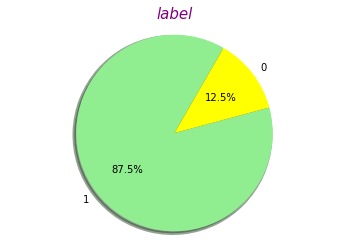

In [75]:
plt.pie(x=df['label'].value_counts(),labels=df['label'].value_counts().index,
            data=df,shadow=True,startangle=60,autopct='%1.1f%%',colors=['lightgreen','yellow','purple','red'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title('label',fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()

(i) There is availibility of class imbalance in target

(ii) 87.5% credit has been payed and 12.5 % credit not been paid


In [76]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,day
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,14.39894
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,8.43890
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.00000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,14.00000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,21.00000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,31.00000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [78]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,day
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,14.39894
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,8.43890
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.00000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,14.00000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,21.00000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,31.00000


<AxesSubplot:xlabel='daily_decr30', ylabel='Density'>

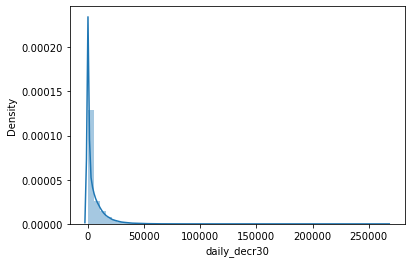

In [79]:
sns.distplot(df['daily_decr30'])

<AxesSubplot:xlabel='daily_decr90', ylabel='Density'>

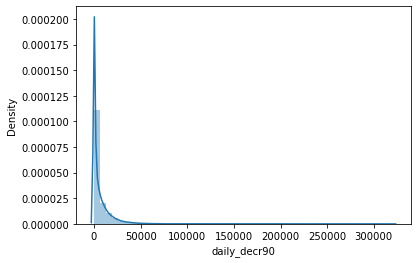

In [80]:
sns.distplot(df['daily_decr90'])

<AxesSubplot:xlabel='rental30', ylabel='Density'>

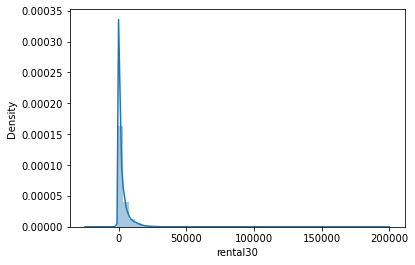

In [81]:
sns.distplot(df['rental30'])

<AxesSubplot:xlabel='daily_decr30', ylabel='rental30'>

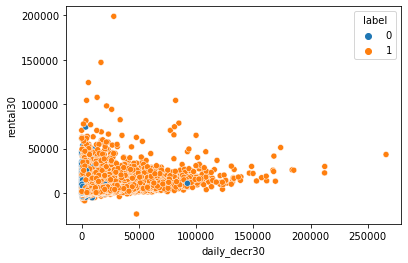

In [82]:
sns.scatterplot(x='daily_decr30',y='rental30',data=df,hue='label')

(i) Average main account balance over last 30 days in dependent on daily amount
spent from main account,averaged over last 30 days.

(ii) Maximum of the unpaid credit are below 50000 as daily amount spent.

<AxesSubplot:xlabel='daily_decr90', ylabel='rental90'>

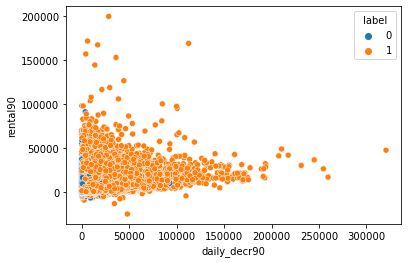

In [83]:
sns.scatterplot(x='daily_decr90',y='rental90',data=df,hue='label')

(i) Average main account balance over last 30 days in dependent on daily amount
spent from main account,averaged over last 30 days.

(ii) Maximum of the unpaid credit are below 50000 as daily amount spent.

<AxesSubplot:xlabel='month', ylabel='last_rech_amt_ma'>

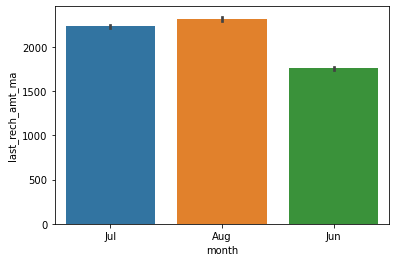

In [84]:
sns.barplot(y='last_rech_amt_ma',x='month',data=df)

(i) Amount of last recharge of  main account was more in the month of August

(ii) It was less in the month of Jun

<AxesSubplot:xlabel='month', ylabel='last_rech_amt_ma'>

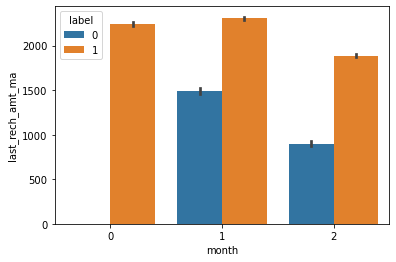

In [149]:
sns.barplot(y='last_rech_amt_ma',x='month',hue='label',data=df)

(i) There is no defaulter in the month of Jul

(ii) Number of defaulter is more in August rather than June

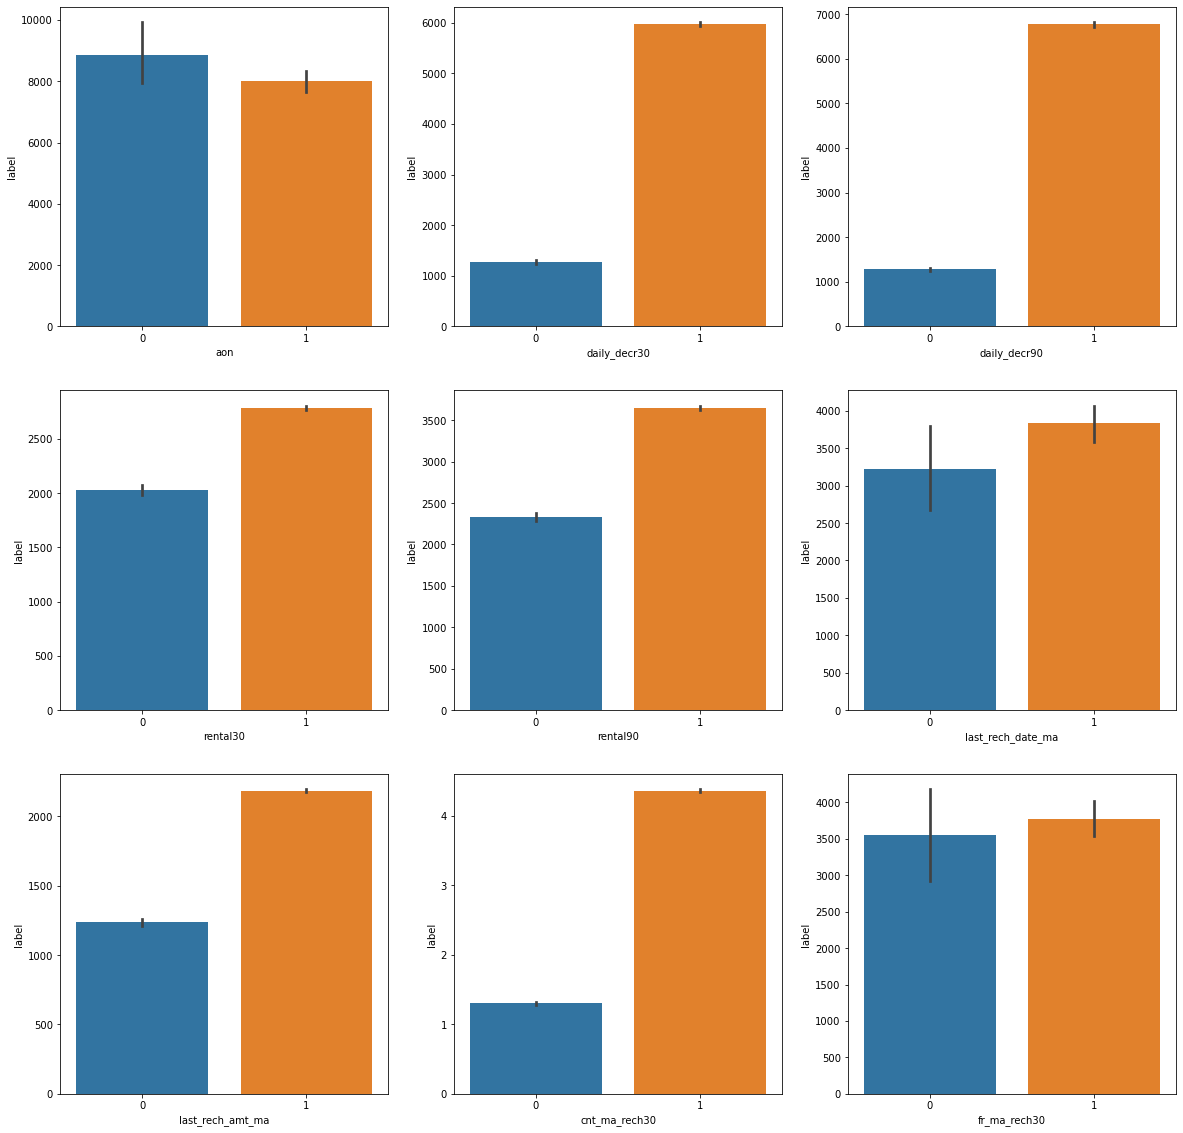

In [85]:
cols1=['aon','daily_decr30','daily_decr90','rental30','rental90','last_rech_date_ma'
      ,'last_rech_amt_ma','cnt_ma_rech30','fr_ma_rech30']
plt.figure(figsize=(20,20))
num=1
for col in cols1:
    if (num<11):
        plt.subplot(3,3,num)
        sns.barplot(x='label',y=col,data=df)
        plt.xlabel(col)
        plt.ylabel('label')
    num+=1
plt.show()

(i) There is more chances of being defaulter for old user

(ii) User who has spent amount in last 30 days even in 90 days  are likely to pay back the credit

(iii) Customer with higher balance in  main account in past 30 or 90 days has lower chances of being defaulter

(iv) Users with higher number of days till last recharge of main account are likely to pay back the credit. 

(v) Users with higher higher amount of  recharge of main account are likely to pay back the credit. 

(vi) User with higher number of recharge in last 30 days are likely to be non-defaulter

(vii) Frequnecy of recharge in last 30 days is not much effecting the target

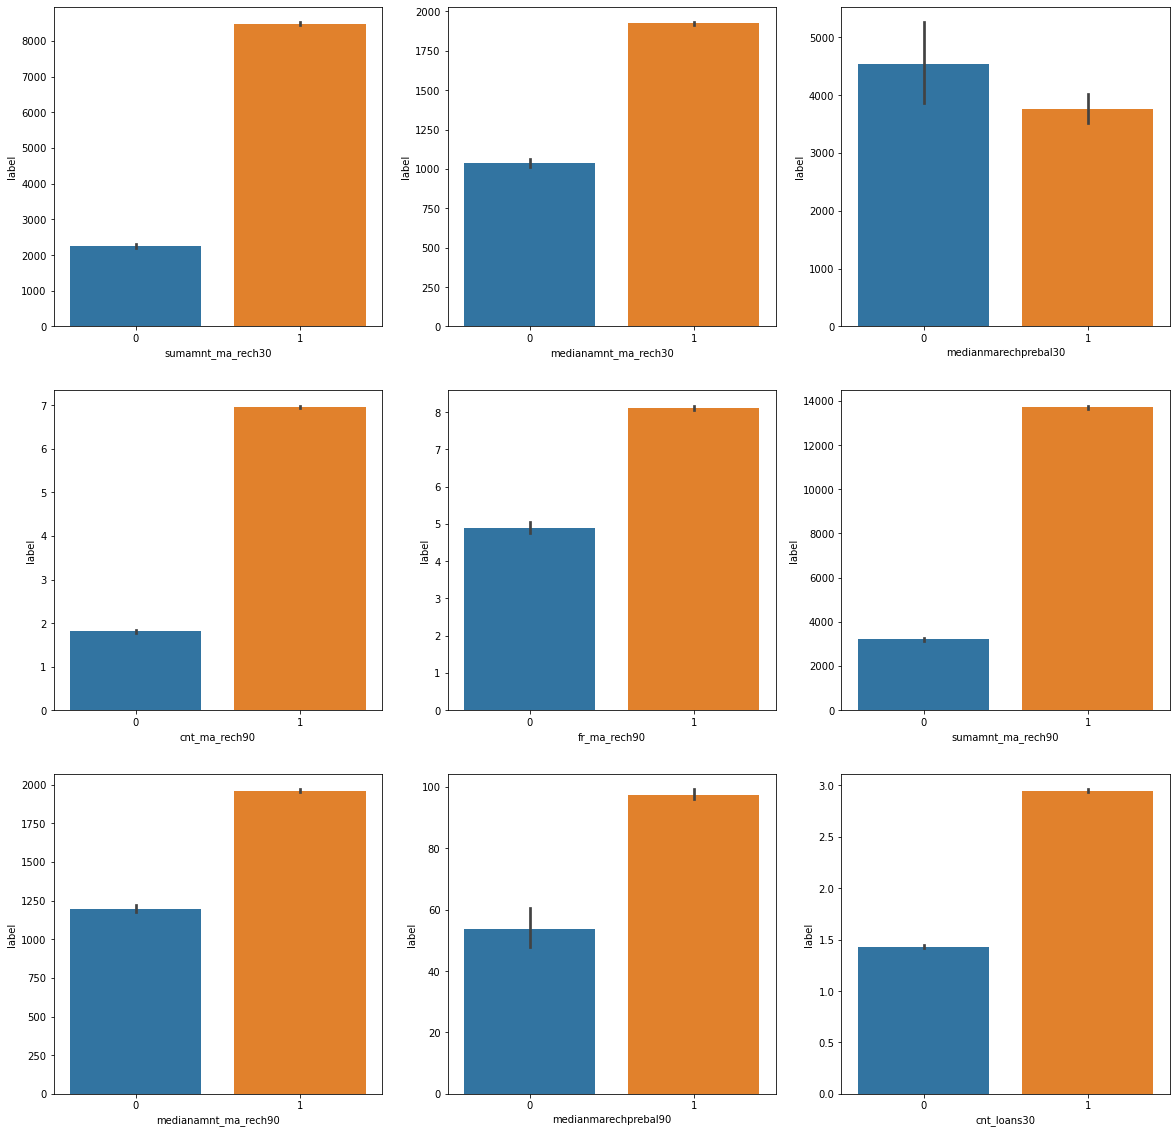

In [86]:
cols1=['sumamnt_ma_rech30','medianamnt_ma_rech30','medianmarechprebal30','cnt_ma_rech90','fr_ma_rech90','sumamnt_ma_rech90'
      ,'medianamnt_ma_rech90','medianmarechprebal90','cnt_loans30']
plt.figure(figsize=(20,20))
num=1
for col in cols1:
    if (num<11):
        plt.subplot(3,3,num)
        sns.barplot(x='label',y=col,data=df)
        plt.xlabel(col)
        plt.ylabel('label')
    num+=1
plt.show()

The users is going to pay back for the follwing conditions

    (i) User with higher total amount recharge in main account over 
    last 30 days 

    (ii) median of amount spent in last 30 days

    (iii) Number of times main account got recharged in last 90 days

    (iv) Frequnecy of main account got reacharged in last 90 days

    (v) Total amount of recharges done in main account over last 90 days

    (vi) Median of acmount of recharges done in main account in last 90 days at user lavel

    (vii) Median of main account balance just before recharge in last 90 days at user lavel

    (viii) Number of time data account recharged in last 30 days
    
Only in below case the user likely to be defaulter
    (i) user with higher Median of main account balance just before recharge in last 30 days at user level

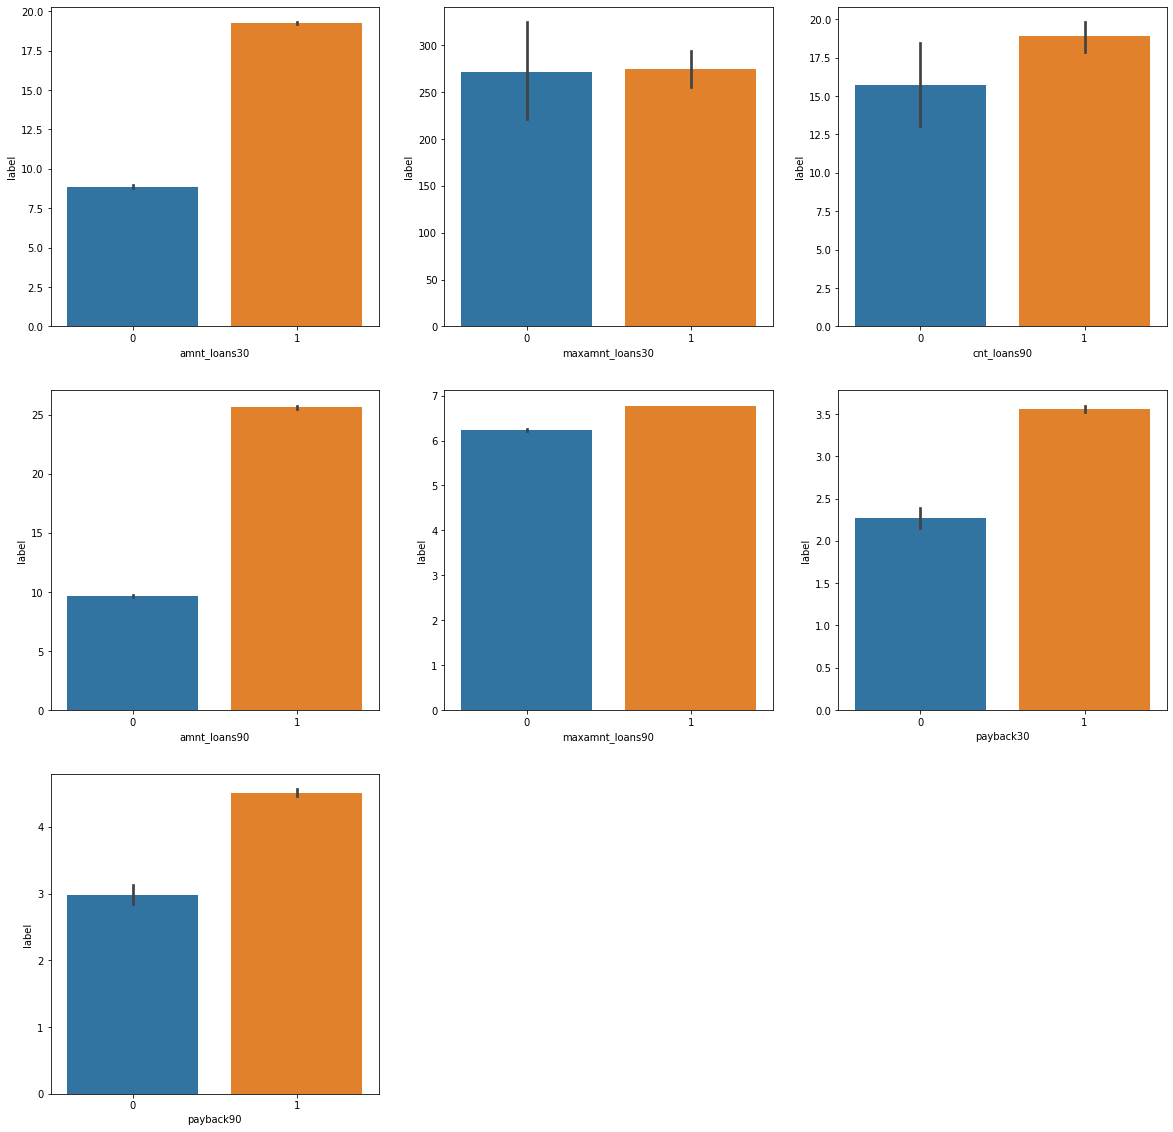

In [87]:
cols1=['amnt_loans30','maxamnt_loans30','cnt_loans90','amnt_loans90','maxamnt_loans90','payback30'
      ,'payback90']
plt.figure(figsize=(20,20))
num=1
for col in cols1:
    if (num<11):
        plt.subplot(3,3,num)
        sns.barplot(x='label',y=col,data=df)
        plt.xlabel(col)
        plt.ylabel('label')
    num+=1
plt.show()

(a) User likey to pay back the loan for the following coditions
    (i) Total amount of loans taken by user in last 30 Days

    (ii) Number of loans taken by user in last 90 days

    (iii) Total amounts of loans taken by user in last 90 days

    (iv) Maximum amount of loans taken in last 90 days

    (v) Average payback time in days over last 30 days

    (vi) Average payback time in days over last 90 days

(b) Maximum amount of loan taken by the user in last 30 days is equally distributed for target

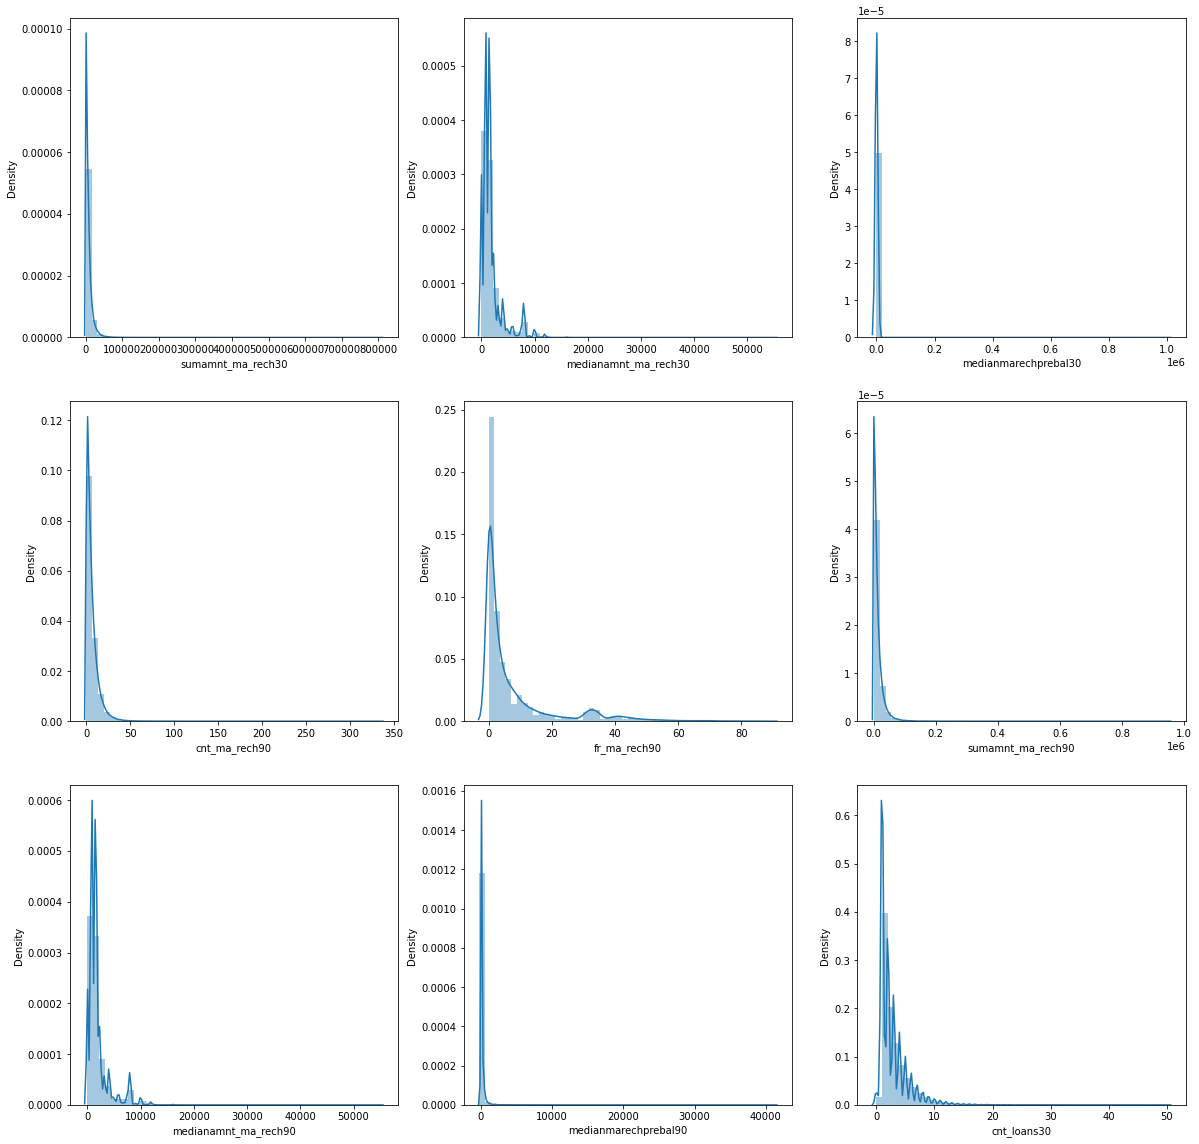

In [88]:
cols1=['sumamnt_ma_rech30','medianamnt_ma_rech30','medianmarechprebal30','cnt_ma_rech90','fr_ma_rech90','sumamnt_ma_rech90'
      ,'medianamnt_ma_rech90','medianmarechprebal90','cnt_loans30']
plt.figure(figsize=(20,20))
num=1
for col in cols1:
    if (num<11):
        plt.subplot(3,3,num)
        sns.distplot(df[col])
        plt.xlabel(col)
        
    num+=1
plt.show()

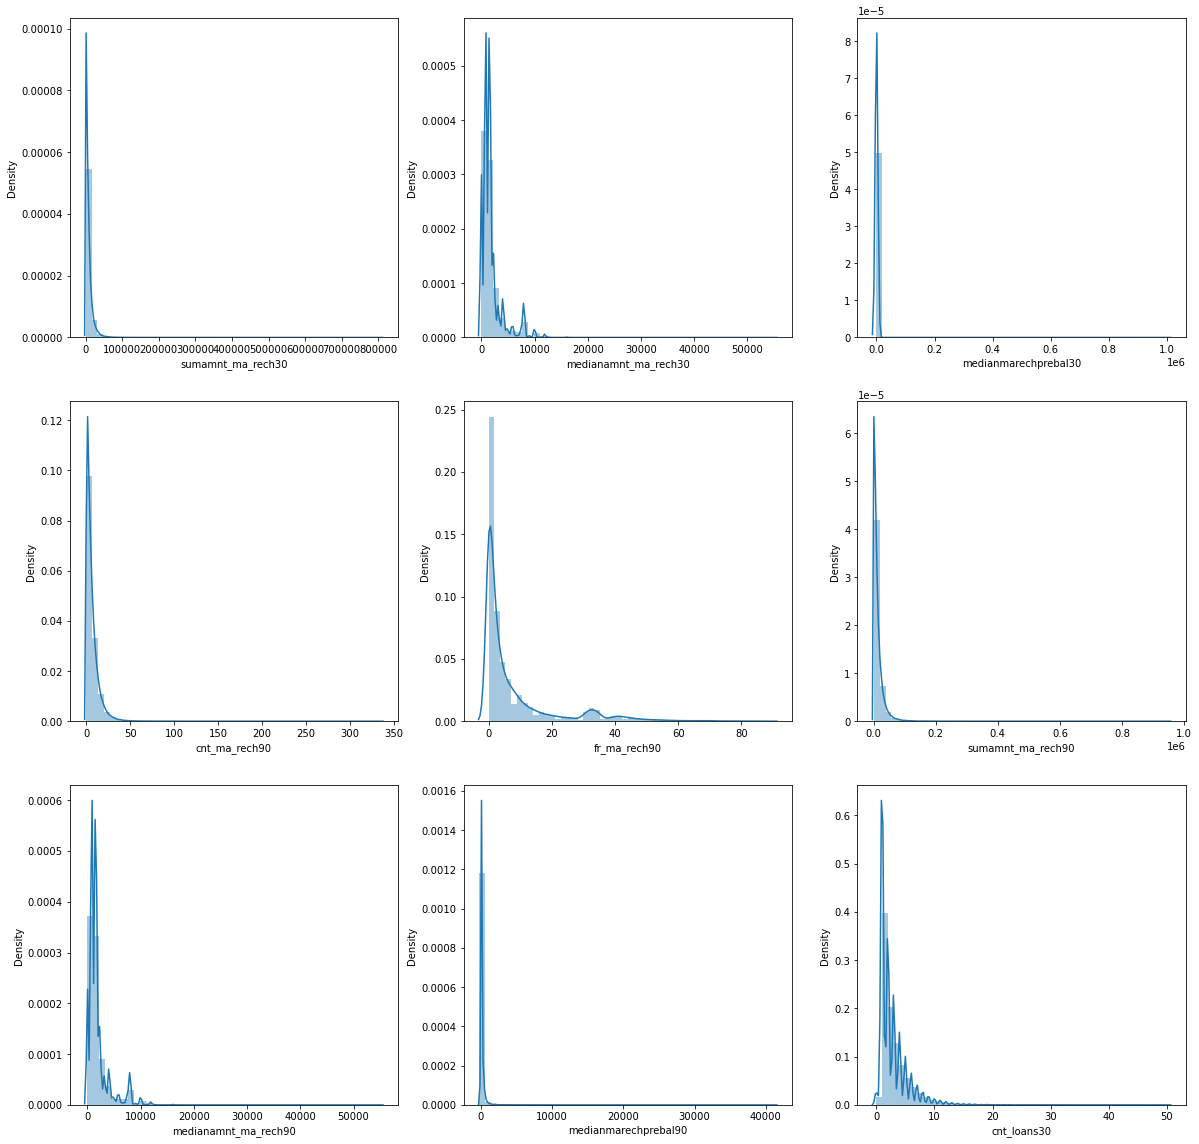

In [89]:
cols1=['sumamnt_ma_rech30','medianamnt_ma_rech30','medianmarechprebal30','cnt_ma_rech90','fr_ma_rech90','sumamnt_ma_rech90'
      ,'medianamnt_ma_rech90','medianmarechprebal90','cnt_loans30']
plt.figure(figsize=(20,20))
num=1
for col in cols1:
    if (num<11):
        plt.subplot(3,3,num)
        sns.distplot(df[col])
        plt.xlabel(col)
        
    num+=1
plt.show()

<Figure size 1008x1008 with 0 Axes>

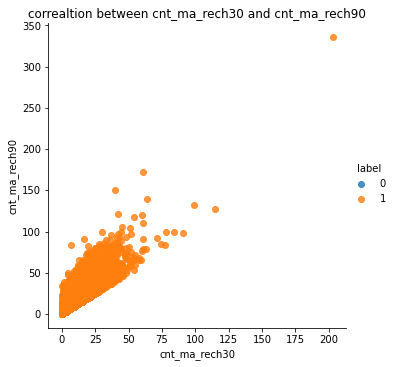

In [90]:
#scatter plot between cnt_ma_rech_30 and cnt_ma_rech90 with respect to label
plt.figure(figsize=(14,14))
sns.lmplot(x='cnt_ma_rech30',y='cnt_ma_rech90',fit_reg=False,data=df,hue='label')
plt.xlabel('cnt_ma_rech30')
plt.title('correaltion between cnt_ma_rech30 and cnt_ma_rech90')
plt.ylabel('cnt_ma_rech90')
plt.show()

<Figure size 1008x1008 with 0 Axes>

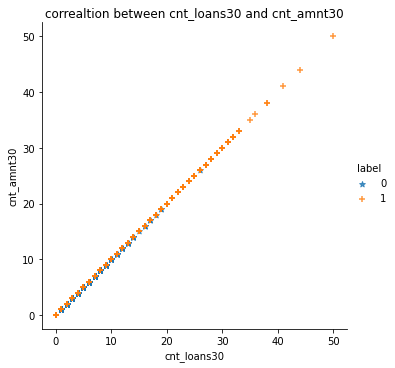

In [91]:
#scatter plot between cnt_loans30 and amnt_loans30 with respect to label
plt.figure(figsize=(14,14))
sns.lmplot(x='cnt_loans30',y='cnt_loans30',fit_reg=False,data=df,hue='label',markers=['*','+'])
plt.xlabel('cnt_loans30')
plt.title('correaltion between cnt_loans30 and cnt_amnt30')
plt.ylabel('cnt_amnt30')
plt.show()

With the amount and number of of loan the number of defaulter also increase

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [93]:
df['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

# Removing the unwanted features

In [94]:
#droping the unwanted columns
df.drop(['pcircle','msisdn'],inplace=True,axis=1)

# Encoding of Categorical Features

In [95]:
#encoding the ordinal categorical feature month
from sklearn.preprocessing import LabelEncoder

df['month']=LabelEncoder().fit_transform(df['month'])

# Correlation 

<AxesSubplot:>

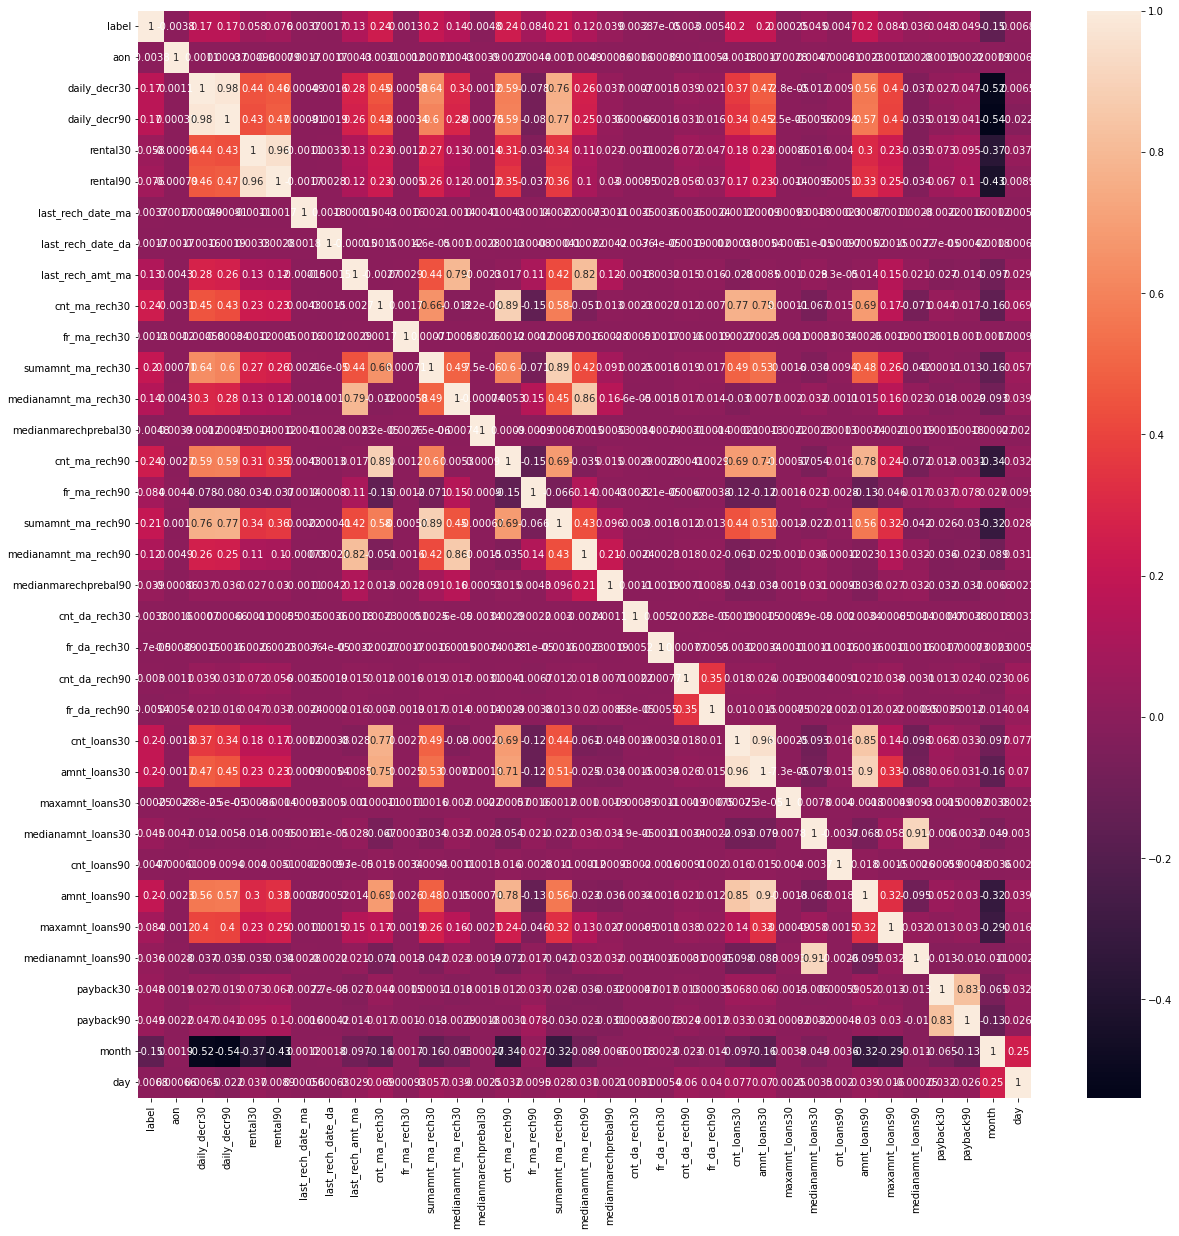

In [96]:
#finding the correlation within features
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

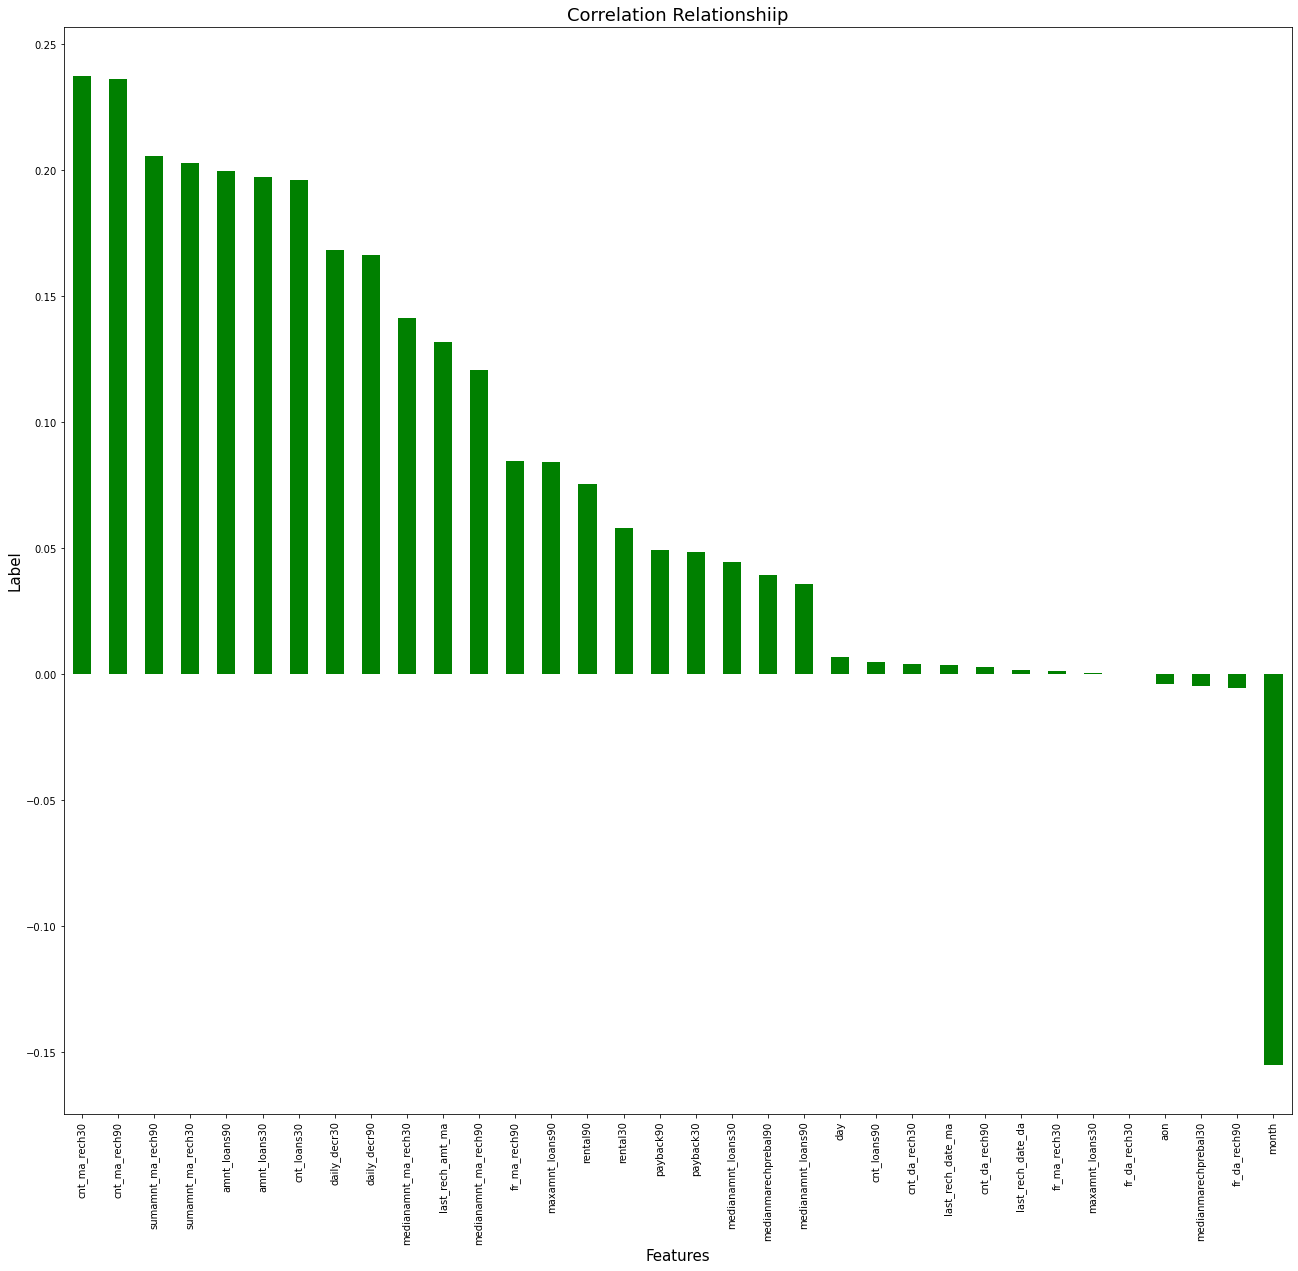

In [97]:
#corealtion with target
# finding the positive and negetive correlated features
plt.figure(figsize=(22,20))
df.corr()['label'].sort_values(ascending = False).drop(['label']).plot(kind='bar',color = 'g')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Label',fontsize=15)
plt.title('Correlation Relationshiip',fontsize=18)
plt.show()

The list of features which are  positively correalated with label listed in descending order

    (i) cnt_ma_rech30

    (ii) cnt_ma_rech90

    (iii) sumamnt_ma_rech90

    (iv) sumamnt_ma_rech30

    (v) amnt_loans90

    (vi) amnt_loans30

    (vii) cnt_loans30

    (viii) daily_decr30

    (ix) daily_decr90

    (X) medianamnt_ma_rech30

    (xi) last_rech_amt_ma

    (xii) medianamnt_ma_rech90

    (xiii) fr_ma_rech90

Only Month / pdate is negatively correlated with label.

# Removing of  Outliers 

In [98]:
#creating list of numerical features
features=['aon','daily_decr30','daily_decr90','rental30','rental90','last_rech_date_ma'
      ,'last_rech_amt_ma','cnt_ma_rech30','fr_ma_rech30','sumamnt_ma_rech30','medianamnt_ma_rech30','medianmarechprebal30','cnt_ma_rech90','fr_ma_rech90','sumamnt_ma_rech90'
      ,'medianamnt_ma_rech90','medianmarechprebal90','cnt_loans30','amnt_loans30','maxamnt_loans30','cnt_loans90','amnt_loans90','maxamnt_loans90','payback30'
      ,'payback90']
df_num=df[features]

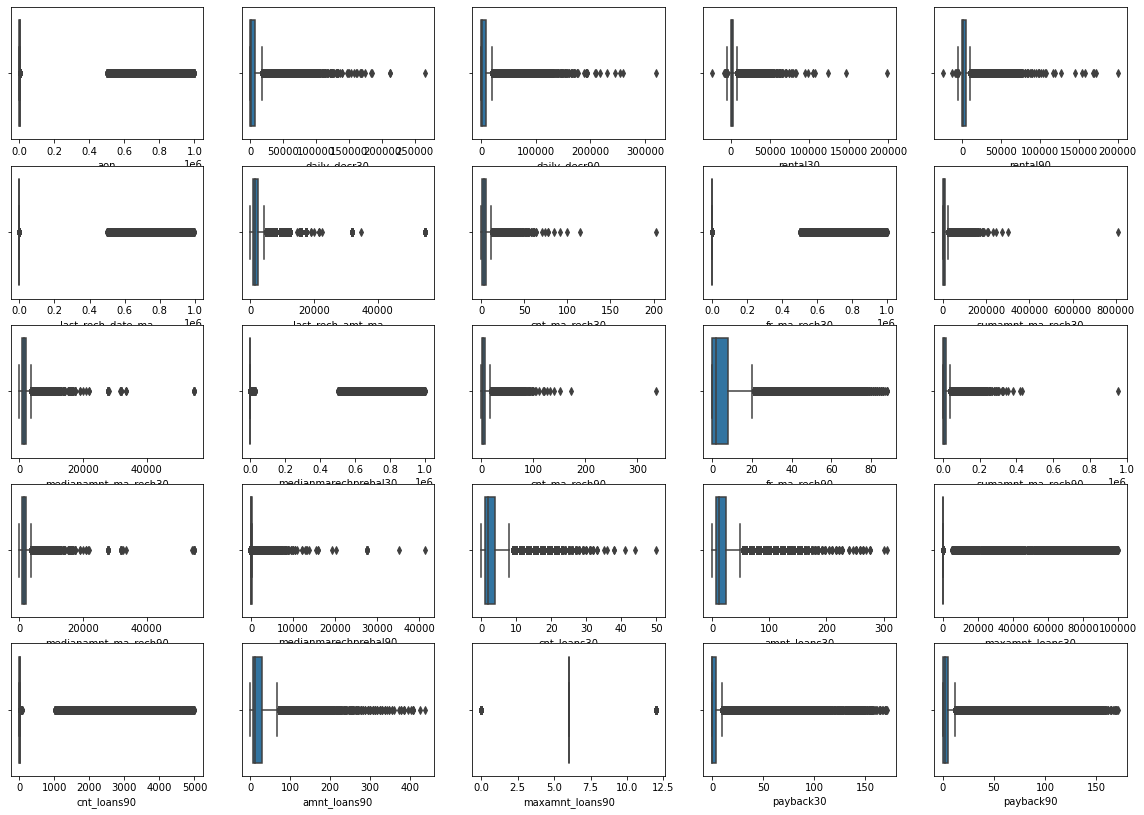

In [99]:
#checking availability of outliers using boxplot
plt.figure(figsize=(20,20))
num=1
for col in features:
    if (num<35):
        plt.subplot(7,5,num)
        sns.boxplot(df[col])
        plt.xlabel(col)
        
    num+=1
plt.show()

There is availability of outliers ,we will remove the outliers using z score values using thresold value 3

In [100]:
#checking the volume of data before removing the outliers
df.shape

(209593, 35)

In [101]:
from scipy.stats import zscore
z=np.abs(zscore(df_num))

In [102]:

df=df[(z<6).all(axis=1)]

In [103]:
#cehcking the volume after removing the outliers
df.shape

(197915, 35)

In [105]:
#cehcking the loss of data after removing the outliers
loss =(209593-197915)*100/209593
loss

5.571750964965433

# Splitting of dataset into Feature and Target

In [113]:
X=df.drop('label',axis=1)
y=df['label']

# Feature Engineering 

# Removing Skewness

In [114]:
#checking the skewness of dataset
X.skew()

aon                      0.947092
daily_decr30             2.444798
daily_decr90             2.587670
rental30                 2.613261
rental90                 2.740138
last_rech_date_ma        3.115103
last_rech_date_da       14.828684
last_rech_amt_ma         2.244841
cnt_ma_rech30            1.829142
fr_ma_rech30             2.012320
sumamnt_ma_rech30        2.278739
medianamnt_ma_rech30     2.450937
medianmarechprebal30    10.751432
cnt_ma_rech90            1.988594
fr_ma_rech90             2.261866
sumamnt_ma_rech90        2.352434
medianamnt_ma_rech90     2.464687
medianmarechprebal90     5.481831
cnt_da_rech30           17.678289
fr_da_rech30            14.730868
cnt_da_rech90           24.750239
fr_da_rech90            29.171533
cnt_loans30              2.064032
amnt_loans30             2.096106
maxamnt_loans30         36.502854
medianamnt_loans30       4.556580
cnt_loans90             44.265391
amnt_loans90             2.330821
maxamnt_loans90          1.722928
medianamnt_loa

In [ ]:
almost every column ha`s the skewness 

In [116]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')
X[features]=scaler.fit_transform(X[features].values)
X.skew()

aon                      0.303696
daily_decr30            -2.112308
daily_decr90            -2.277006
rental30                 0.370278
rental90                 0.395494
last_rech_date_ma        0.123156
last_rech_date_da       14.828684
last_rech_amt_ma        -0.093891
cnt_ma_rech30           -0.005969
fr_ma_rech30             0.135791
sumamnt_ma_rech30       -0.359056
medianamnt_ma_rech30    -0.217367
medianmarechprebal30     2.025687
cnt_ma_rech90           -0.008971
fr_ma_rech90             0.142020
sumamnt_ma_rech90       -0.258736
medianamnt_ma_rech90    -0.077315
medianmarechprebal90     1.427391
cnt_da_rech30           17.678289
fr_da_rech30            14.730868
cnt_da_rech90           24.750239
fr_da_rech90            29.171533
cnt_loans30              0.038414
amnt_loans30             0.005448
maxamnt_loans30         -0.942940
medianamnt_loans30       4.556580
cnt_loans90              0.095254
amnt_loans90            -0.005114
maxamnt_loans90          0.375392
medianamnt_loa

# Scaling of data

In [118]:
#scaling the numerical features using the sklean StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X[features]=sc.fit_transform(X[features])

# MultiCollinearity

In [121]:
# checking the VIF values 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,vif,Features
0,1.032763,aon
1,287.270544,daily_decr30
2,300.603380,daily_decr90
3,14.574005,rental30
4,15.637358,rental90
5,1.704586,last_rech_date_ma
6,1.004615,last_rech_date_da
7,6.530047,last_rech_amt_ma
8,53.475367,cnt_ma_rech30
9,2.087650,fr_ma_rech30


There is availabilty of mulitcolinearity

# PCA

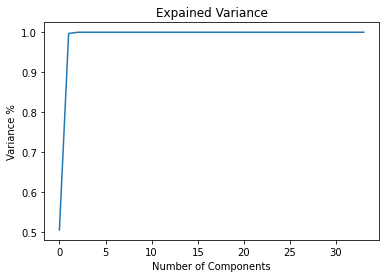

In [123]:
# determining the number of features required for best accuarcy
from sklearn.decomposition import PCA
pca=PCA()
principleComponents =pca.fit_transform(X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Expained Variance')
plt.show()

# Selection the K best Features

In [128]:
from sklearn.feature_selection import SelectKBest, f_classif
bestfeat=SelectKBest(score_func=f_classif,k='all')
fit=bestfeat.fit(X,y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)
dfcolumns.head()
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Feature','Score']
print(featureScores.nlargest(35,'Score'))

                 Feature         Score
15     sumamnt_ma_rech90  31370.447344
13         cnt_ma_rech90  29945.912618
10     sumamnt_ma_rech30  29411.047020
8          cnt_ma_rech30  26710.895311
11  medianamnt_ma_rech30  16701.033985
26           cnt_loans90  15446.803853
27          amnt_loans90  14834.667686
7       last_rech_amt_ma  14726.352004
16  medianamnt_ma_rech90  13705.779972
2           daily_decr90  13408.560920
1           daily_decr30  13196.172695
9           fr_ma_rech30  12915.372019
31             payback90  12712.193444
30             payback30  11746.247147
22           cnt_loans30  11526.284321
23          amnt_loans30  11402.060717
14          fr_ma_rech90  10460.323120
32                 month   4730.440268
12  medianmarechprebal30   3174.579380
17  medianmarechprebal90   2911.041685
0                    aon   1677.523744
5      last_rech_date_ma   1317.312742
4               rental90   1269.269470
28       maxamnt_loans90    896.035712
3               rental30 

In [131]:
#removing the multicollnear features and less important features
X.drop(['daily_decr90','rental90','sumamnt_ma_rech30','sumamnt_ma_rech90',
'cnt_loans30','amnt_loans90','last_rech_date_da','fr_da_rech30'],inplace=True,axis=1)

# Handling Class imbalance

In [153]:
df['label'].value_counts()

1    173035
0     24880
Name: label, dtype: int64

In [132]:
# solving the class imbalance problem
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X,y = SM.fit_resample(X,y)
y.value_counts()

0    173035
1    173035
Name: label, dtype: int64

# Finding best randome state for building model

In [136]:
#Finding the best random state for spliting
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is',maxAccu,' on Random state',maxRS)


Best Accuracy is 0.771434845928015  on Random state 185


In [137]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC


In [138]:
# function for model training and accuracy
def model_test(model):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=185)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print(model)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print(20*'--')

In [139]:
# instanciation of model
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
gn=GaussianNB()
knn=KNeighborsClassifier(n_neighbors=5)
ad=AdaBoostClassifier(n_estimators=100)
models=[lr,dtc,rfc,gn,knn,ad]

In [140]:
# calling the funciton to find the best accuracy of model
for m in models:
    model_test(m)

LogisticRegression()
0.771434845928015
[[33109 10223]
 [ 9552 33634]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77     43332
           1       0.77      0.78      0.77     43186

    accuracy                           0.77     86518
   macro avg       0.77      0.77      0.77     86518
weighted avg       0.77      0.77      0.77     86518

----------------------------------------
DecisionTreeClassifier()
0.9147229478258859
[[39851  3481]
 [ 3897 39289]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92     43332
           1       0.92      0.91      0.91     43186

    accuracy                           0.91     86518
   macro avg       0.91      0.91      0.91     86518
weighted avg       0.91      0.91      0.91     86518

----------------------------------------
RandomForestClassifier()
0.9525416676298574
[[41234  2098]
 [ 2008 41178]]
              precision    recall  f1-score 

# Cross validation

In [143]:
#checking the cross validation score
from sklearn.model_selection import cross_val_score
for m in models:
    score=cross_val_score(m,X,y,cv=5)
    print('Mean Accuracy of ',m)
    print(score.mean())
    print(20*'--')

Mean Accuracy of  LogisticRegression()
0.7667726182564221
----------------------------------------
Mean Accuracy of  DecisionTreeClassifier()
0.9120091311006444
----------------------------------------
Mean Accuracy of  RandomForestClassifier()
0.9486260005201259
----------------------------------------
Mean Accuracy of  GaussianNB()
0.7563787673014131
----------------------------------------
Mean Accuracy of  KNeighborsClassifier()
0.8887132661022337
----------------------------------------
Mean Accuracy of  AdaBoostClassifier(n_estimators=100)
0.8745947351691854
----------------------------------------


# ROC AUC Score

AUC Score of  LogisticRegression()
0.771656900658023




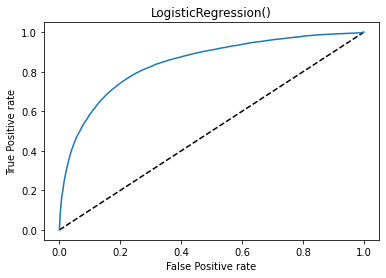

----------------------------------------
AUC Score of  DecisionTreeClassifier()
0.9788904238928935




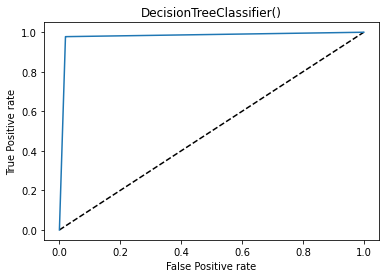

----------------------------------------
AUC Score of  RandomForestClassifier()
0.9879110628642348




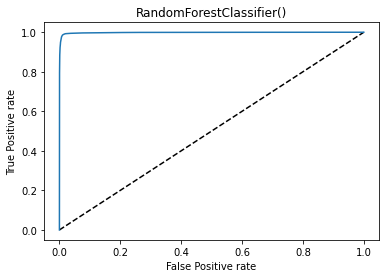

----------------------------------------
AUC Score of  GaussianNB()
0.7589127938270881




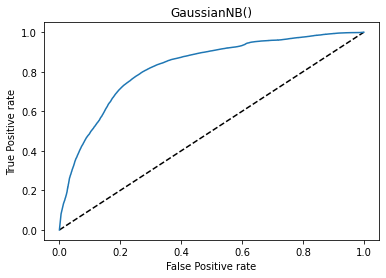

----------------------------------------
AUC Score of  KNeighborsClassifier()
0.9113445683613566




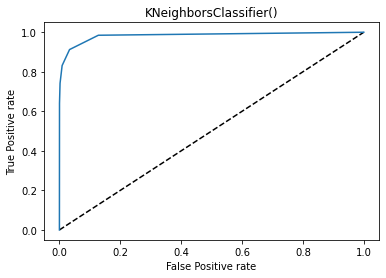

----------------------------------------
AUC Score of  AdaBoostClassifier(n_estimators=100)
0.8764267530194124




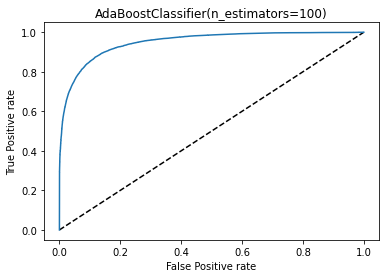

----------------------------------------


In [144]:
# checkinga 
from sklearn.metrics import roc_curve, roc_auc_score
for m in models:
    y_pred_prob=m.predict_proba(x_test)[:,1]
    fpr,tpr,thesholds=roc_curve(y_test,y_pred_prob)
    auc_score=roc_auc_score(y_test,m.predict(x_test))
    print('AUC Score of ',m)
    print(auc_score)
    print('\n')
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=m)
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.title(m)
    plt.show()
    print(20*'--')

# Hyper Parameter Tuning

In [145]:
#setting the parameters for best tuning
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[80,100,200,300],'criterion':['gini','entropy'],'max_depth':np.arange(2,10),'max_features':['auto','sqrt','log2'],'min_samples_split':[2,3,4,5]}


In [147]:
GSV=GridSearchCV(RandomForestClassifier(),parameters,cv=3)
GSV.fit(x_train,y_train)
GSV.best_params_

KeyboardInterrupt: 

Could not complete the best parameter output as the computaion 
time required is much more.

In [151]:
#Finding the accuracy with best parameters
final_mod=RandomForestClassifier(criterion='gini',min_samples_split=2,min_samples_leaf=1,n_estimators=100,max_features='auto')
final_mod.fit(X,y)
pred=final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

99.99768834231027


# Saving the Model

In [152]:
#saving the model for future use
import joblib
joblib.dump(final_mod,'Micro_Credit_Defaulter.obj')

['Micro_Credit_Defaulter.obj']